In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

C:\Users\zuhai\anaconda3\envs\AI\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('titanic_toy.csv')
df.head(10)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
5,NaN,8.4583,0,0
6,54.0,51.8625,0,0
7,2.0,21.0750,4,0
8,27.0,11.1333,2,1
9,14.0,30.0708,1,1


In [3]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


# Applying train test slip

In [5]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train.isnull().sum()

Age       148
Fare       36
Family      0
dtype: int64

In [8]:
(X_train.isnull().mean())*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [9]:
X_train.shape, X_test.shape


((712, 3), (179, 3))

# Applying mean/median imputation by pandas

In [10]:
#for X_train
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()
#for X_test
mean_age=X_test['Age'].mean()
median_age=X_test['Age'].median()

mean_fare=X_test['Fare'].mean()
median_fare=X_test['Fare'].median()


In [11]:
#for X_train
X_train['median_age']=X_train['Age'].fillna(median_age)
X_train['mean_age']=X_train['Age'].fillna(mean_age)

X_train['median_fare']=X_train['Fare'].fillna(median_fare)
X_train['mean_fare']=X_train['Fare'].fillna(mean_age)
#for X_test
X_test['median_age']=X_test['Age'].fillna(median_age)
X_test['mean_age']=X_test['Age'].fillna(mean_age)

X_test['median_fare']=X_test['Fare'].fillna(median_fare)
X_test['mean_fare']=X_test['Fare'].fillna(mean_age)

In [12]:
X_train.head(10)

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
30,40.0,27.7208,0,40.0,40.0000,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0000,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0000,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0000,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0000,9.8458,9.8458
213,30.0,13.0000,0,30.0,30.0000,13.0000,13.0000
157,30.0,8.0500,0,30.0,30.0000,8.0500,8.0500
780,13.0,7.2292,0,13.0,13.0000,7.2292,7.2292
572,36.0,26.3875,0,36.0,36.0000,26.3875,26.3875
77,NaN,8.0500,0,28.0,29.3728,8.0500,8.0500


In [13]:
X_test.head(10)

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
707,42.0,26.2875,0,42.0,42.0,26.2875,26.2875
37,21.0,8.0500,0,21.0,21.0,8.0500,8.0500
615,24.0,65.0000,3,24.0,24.0,65.0000,65.0000
169,28.0,56.4958,0,28.0,28.0,56.4958,56.4958
68,17.0,7.9250,6,17.0,17.0,7.9250,7.9250
606,30.0,7.8958,0,30.0,30.0,7.8958,7.8958
630,80.0,30.0000,0,80.0,80.0,30.0000,30.0000
785,25.0,7.2500,0,25.0,25.0,7.2500,7.2500
660,50.0,133.6500,2,50.0,50.0,133.6500,133.6500
728,25.0,26.0000,1,25.0,25.0,26.0000,26.0000


# Checking variance, covariance, corelation and by graphical implementation checking for outlier and spread of data

In [14]:
# checking variance for X_train
print('X_train : ')
print('Original Age Variance : ',X_train['Age'].var())
print('Mean Age Variance : ',X_train['mean_age'].var())
print('Median Age Variance : ',X_train['median_age'].var())

print('Original Fare Variance : ',X_train['Fare'].var())
print('Mean Fare Variance : ',X_train['mean_fare'].var())
print('Median Fare Variance : ',X_train['median_fare'].var())
# checking variance for X_test
print('X_test : ')
print('Original Age Variance : ',X_test['Age'].var())
print('Mean Age Variance : ',X_test['mean_age'].var())
print('Median Age Variance : ',X_test['median_age'].var())

print('Original Fare Variance : ',X_test['Fare'].var())
print('Mean Fare Variance : ',X_test['mean_fare'].var())
print('Median Fare Variance : ',X_test['median_fare'].var())


X_train : 
Original Age Variance :  204.3495133904614
Mean Age Variance :  161.84076365047017
Median Age Variance :  162.33852985330878
Original Fare Variance :  2448.197913706318
Mean Fare Variance :  2324.7446703050946
Median Fare Variance :  2341.0882322100842
X_test : 
Original Age Variance :  237.50093573154342
Mean Age Variance :  198.80696305617965
Median Age Variance :  199.06425771138032
Original Fare Variance :  2872.7824991474345
Mean Fare Variance :  2727.6465311807033
Median Fare Variance :  2741.4698976996656


<AxesSubplot: ylabel='Density'>

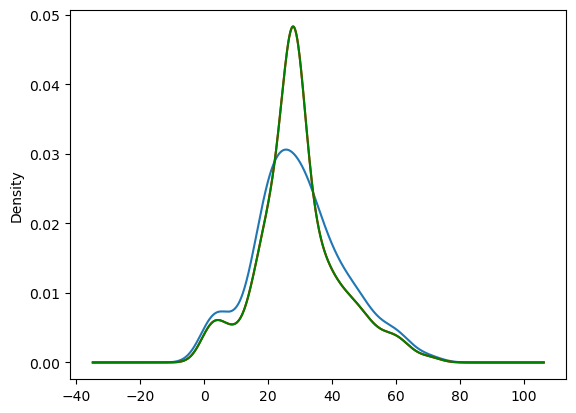

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original distribution of age
X_train['Age'].plot(kind='kde',ax=ax)

#distribution of mean_age
X_train['median_age'].plot(kind='kde',ax=ax,color='red')

#distribution of median_age
X_train['median_age'].plot(kind='kde',ax=ax,color='green')



<AxesSubplot: ylabel='Density'>

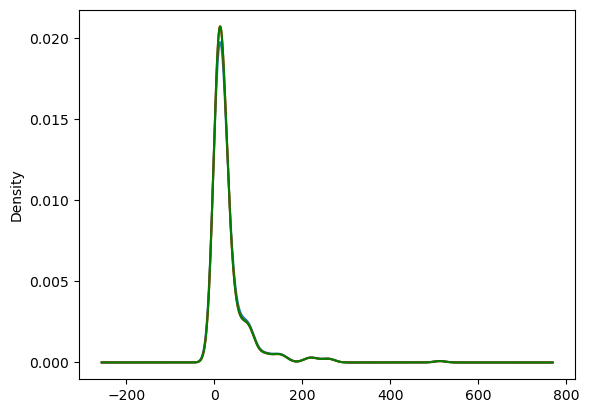

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original distribution of fare
X_train['Fare'].plot(kind='kde',ax=ax)

#distribution of fare_age
X_train['median_fare'].plot(kind='kde',ax=ax,color='red')

#distribution of fare_age
X_train['median_fare'].plot(kind='kde',ax=ax,color='green')



In [17]:
#checking for covariance

In [18]:
X_train.cov()

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.802911,66.342438
Fare,70.719262,2448.197914,17.258917,59.661820,56.542414,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.088278,-5.132730,16.479132,16.401354
median_age,204.349513,59.661820,-5.088278,162.338530,161.934274,55.096579,56.373299
mean_age,204.349513,56.542414,-5.132730,161.934274,161.840764,52.188730,53.421130
median_fare,64.802911,2448.197914,16.479132,55.096579,52.188730,2341.088232,2327.158866
mean_fare,66.342438,2448.197914,16.401354,56.373299,53.421130,2327.158866,2324.744670


In [19]:
#checking for correlation
X_train.corr()

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087261,0.089695
Fare,0.092644,1.000000,0.208268,0.094361,0.089552,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.241469,-0.243953,0.205933,0.205681
median_age,1.000000,0.094361,-0.241469,1.000000,0.999043,0.089373,0.091765
mean_age,1.000000,0.089552,-0.243953,0.999043,1.000000,0.084786,0.087093
median_fare,0.087261,1.000000,0.205933,0.089373,0.084786,1.000000,0.997538
mean_fare,0.089695,1.000000,0.205681,0.091765,0.087093,0.997538,1.000000


<AxesSubplot: >

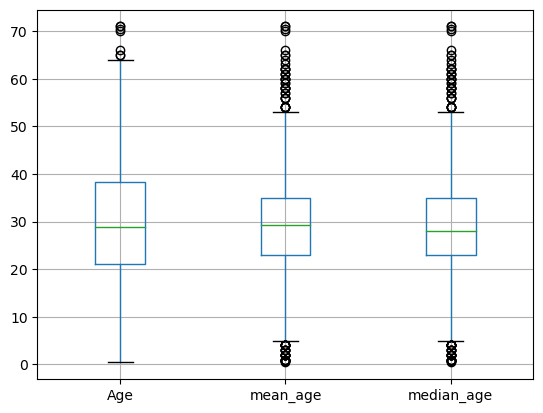

In [20]:
#checking for outliers age
X_train[['Age','mean_age','median_age']].boxplot()

<AxesSubplot: >

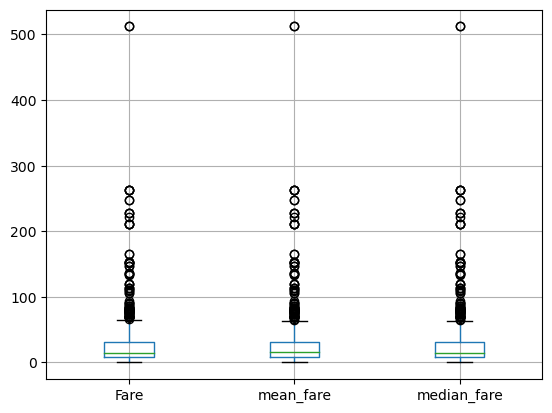

# By Sklearn

# Applying train test split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [24]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [26]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [27]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [28]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [29]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [30]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [31]:
X_test

array([[ 42.        ,  26.2875    ,   0.        ],
       [ 21.        ,   8.05      ,   0.        ],
       [ 24.        ,  65.        ,   3.        ],
       [ 28.        ,  56.4958    ,   0.        ],
       [ 17.        ,   7.925     ,   6.        ],
       [ 30.        ,   7.8958    ,   0.        ],
       [ 80.        ,  30.        ,   0.        ],
       [ 25.        ,   7.25      ,   0.        ],
       [ 50.        , 133.65      ,   2.        ],
       [ 25.        ,  26.        ,   1.        ],
       [ 35.        ,  26.        ,   0.        ],
       [ 35.        ,  90.        ,   1.        ],
       [ 55.        ,  16.        ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 19.        ,   7.8542    ,   1.        ],
       [ 28.75      ,  15.2458    ,   2.        ],
       [ 49.        ,   0.        ,   0.        ],
       [ 18.        ,  32.61759689,   1.        ],
       [ 65.        ,   7.75   